In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('./movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# 1.) What's the probability that a movie was longer than an hour and a half? Two hours?

In [3]:
hour_half = df[df.duration > 90].duration.count()
total = df['duration'].count()
hour_half / total

0.810461416070008

In [4]:
two_hour = df[df.duration > 120].duration.count()
total = df['duration'].count()
two_hour / total

0.21221161495624502

## Answer: 81% probability of being longer than an hour and a half, 21% probability of being longer than two hours

# 2.) What's the probability that a movie was directed by Stephen Spielberg?

In [5]:
total_directors = df['director_name'].count()
spielberg = df.query('director_name == "Steven Spielberg"').director_name.count()
spielberg / total_directors

0.005264223527029763

## Answer: Really, really small.

# 3.) What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [6]:
eastwood_under = df.query('director_name == "Clint Eastwood" and gross < budget').director_name.count()
eastwood_total = df.query('director_name == "Clint Eastwood"').director_name.count()
eastwood_under / eastwood_total

0.35

## Answer: Decent -- about a 35% probability

# 4.) What's the probability that a movie generally grossed more than its budget?

In [7]:
total_films = df.gross.count()
profitable = df.query('gross > budget').gross.count()
profitable / total_films

0.4929069487857658

## Answer: It's a coinflip -- right at 49% probability

# 5.) What's the probability that a movie grossed over the average gross of this data set?

In [8]:
average_gross = df.gross.mean()
above_average = df[df.gross > average_gross].gross.count()
above_average / total_films

0.31882664101947583

## Answer: Just shy of 32%

# For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).

# 6.) In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [9]:
false_positive = df.query('gross < budget and imdb_score >= 6')
false_positive.imdb_score.count() / total_films

0.2945419572012503

## Answer: About 29% probability of being a false positive, confirming my suspicions about nearly a third of films people tell me I should watch

In [10]:
false_negative = df.query('gross > budget and imdb_score <= 6')
false_negative.imdb_score.count() / total_films

0.12238518874729502

## Answer: About 12% probability of being a false negative, 'cause sometimes a dumpster fire is still fun

### Examples of false positives and negatives below.

In [11]:
false_positive.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000


In [12]:
false_negative.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
36,Color,Michael Bay,366.0,150.0,0.0,464.0,Kevin Dunn,894.0,402076689.0,Action|Adventure|Sci-Fi,...,1439.0,English,USA,PG-13,200000000.0,2009.0,581.0,6.0,2.35,0
37,Color,Michael Bay,378.0,165.0,0.0,808.0,Sophia Myles,974.0,245428137.0,Action|Adventure|Sci-Fi,...,918.0,English,USA,PG-13,210000000.0,2014.0,956.0,5.7,2.35,56000
122,Color,Shawn Levy,185.0,105.0,189.0,1000.0,Rami Malek,49000.0,177243721.0,Adventure|Comedy|Family|Fantasy,...,209.0,English,USA,PG,150000000.0,2009.0,3000.0,5.9,2.35,2000


# 7.) If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [13]:
tom_hanks = df.query('actor_1_name == "Tom Hanks" and gross > budget').gross.count()
harrison_ford = df.query('actor_1_name == "Harrison Ford" and gross > budget').gross.count()
tom_hanks > harrison_ford

True

## Answer: They're about equal for films that grossed higher than the budget, so you're probably fine.

# 8.) Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [14]:
tom_hanks = df.query('actor_1_name == "Tom Hanks" and imdb_score >= 6').gross.count()
harrison_ford = df.query('actor_1_name == "Harrison Ford" and imdb_score >= 6').gross.count()

## Answer: Tom Hanks again has a slightly higher number of films with a high rating, so you are still probably fine with Tom Hanks.

# 9.) What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [28]:
time_window = df.query('duration > 69 and duration < 90').duration.count()
time_window / total_films

0.16037509016590526

## Answer: 16% probability

# 10.) How does the distribution of movie budgets compare to the movie gross values?

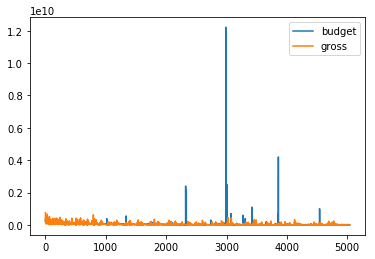

In [16]:
gross_budget = df.query('budget != "NaN" and gross != "NaN"')
gross_budget[['budget', 'gross']].plot()

## Answer: Budgets seem to be all over the place, and frequently not recovered. Yay Hollywood Accounting!

# 11.) Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

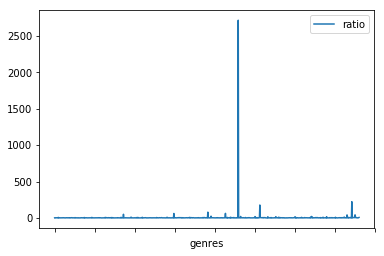

In [31]:
df['ratio'] = df['gross'] / df['budget']
genres = pd.DataFrame(df[['genres','ratio']]).query('ratio != "NaN"').groupby(df.genres).mean()
genres.plot()

In [18]:
genres.nlargest(10, 'ratio')

,ratio
genres,
Biography|Documentary,2715.660550
Horror,222.622792
Comedy|Documentary|Drama,177.374892
Adventure|Family|Romance,79.105200
Animation|Family|Fantasy|Musical,62.442910
Adventure|Biography|Drama|Horror|Thriller,61.001764
Action|Crime|Drama|Romance|Thriller,49.900815
Horror|Thriller,42.454615
Family|Sci-Fi,41.423758


## Answer: Biography/Documentary by a longshot, followed by horror. Probably because of the market for low budget docs and horror flicks.

# 12.) Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

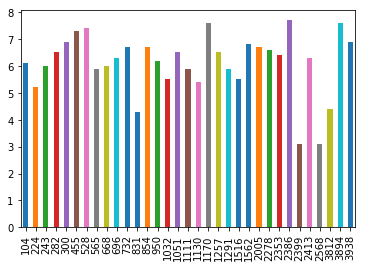

In [46]:
cage = df.query('actor_1_name == "Nicolas Cage"')
no_cage = df.query('actor_1_name != "Nicolas Cage"')
cage.imdb_score.plot(kind='bar')

In [47]:
cage.imdb_score.mean()

6.118181818181818

In [50]:
no_cage.imdb_score.mean()

6.444271457085829

## Answer: No. Cage averages 6.11, and the rest of the data averages 6.44. Insignificant IMO, and I will use this data as ammunition against a friend who refuses to admit he's not a terrible actor. Raising Arizona is a masterpiece, damnit!

# 13.) Have any years grossed a statistically-significant higher amount than the other years?

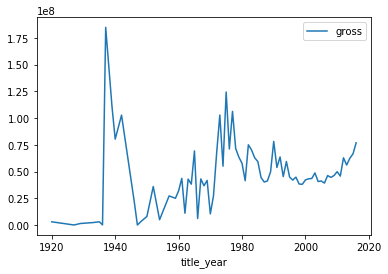

In [20]:
cleaned = df.query('title_year != "NaN" and gross != "NaN"')
cleaned[['title_year', 'gross']].groupby('title_year').mean().plot()

## Answer: Looks like 1939 was a wild time to be making money in Hollywood.